In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import statsmodels.api as sm
import warnings

# Import RFE and LinearRegression for Model building
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# For splitting the data between train and test
from sklearn.model_selection import train_test_split

# For rescaling the features
from sklearn.preprocessing import MinMaxScaler

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# to ignore the warnings
warnings.filterwarnings('ignore')

## Step 1. Reading, Understanding and Visualizing the data

#### Step 1.a - Reading the data

In [2]:
# Reading data in dataframe
day_df = pd.read_csv('day.csv')

#### Step 1.b Understanding the data

In [3]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# number of rows and features
day_df.shape

(730, 16)

In [5]:
# Checking for null values in day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Statistical information about the data
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# EDA - Dropping features which are not necessary
# instant - index coloumn
# dteday - We would have used it for deriving year or month but we already have them as other columns
# casual and registered - they will cause data leakage as they will not be available for prediction
# Also the error in predicting casual and registered will be more than the count (cnt).
features_to_br_dropped = ['instant', 'dteday', 'casual', 'registered']
day_df.drop(features_to_br_dropped, axis=1, inplace=True)

In [8]:
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
day_df.shape

(730, 12)

In [10]:
# There are some features which are actually categorical but they look continuous here
# For categorical its better to use boxplot to better visualize 
# Lets put lables for them - season, mnth, weekday, weathersit
day_df['season'] = day_df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
day_df['mnth'] = day_df['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'june',
                                      7:'july', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})
day_df['weekday'] = day_df['weekday'].map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 
                                           4:'thu', 5:'fri', 6:'sat'})                       
day_df['weathersit']= day_df['weathersit'].map({1:'Clear', 2:'Misty', 
                                                3:'Light_Snow', 
                                                4:'Heavy_Rain'})

In [11]:
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Step 1.c Visulaizing the data

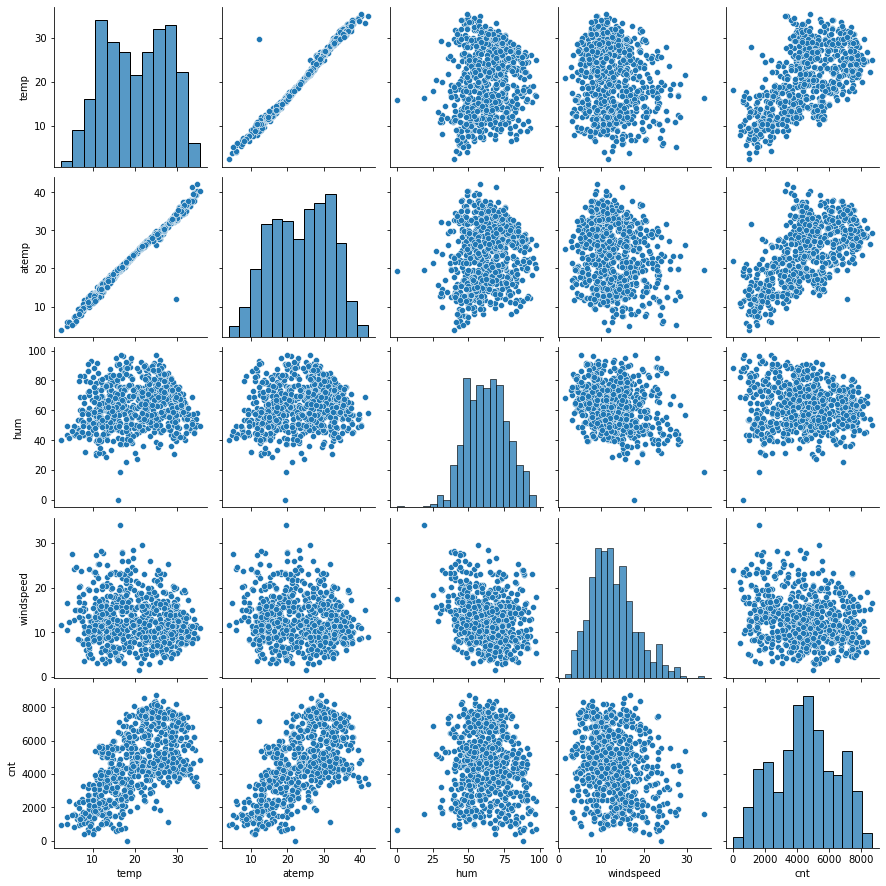

In [12]:
# First we want to know is Linear regression makes sense or not.
# Here cnt should be in some way lineary related to some of the variables.
# So we draw a scatter plot and look for linearity, if we don't find any then no point of doing Linear regression.

# For continuous variables 
# It will create scatter plot for pair of numerical variables. 
# We need this only for continuous variables
continuous_variables = ['temp','atemp','hum','windspeed','cnt']
sns.pairplot(day_df[continuous_variables]) 
plt.show()

### Looking from above pairplot we have some variables like temp and atemp which are lineraly related to cnt. So linear regression makes sense here.


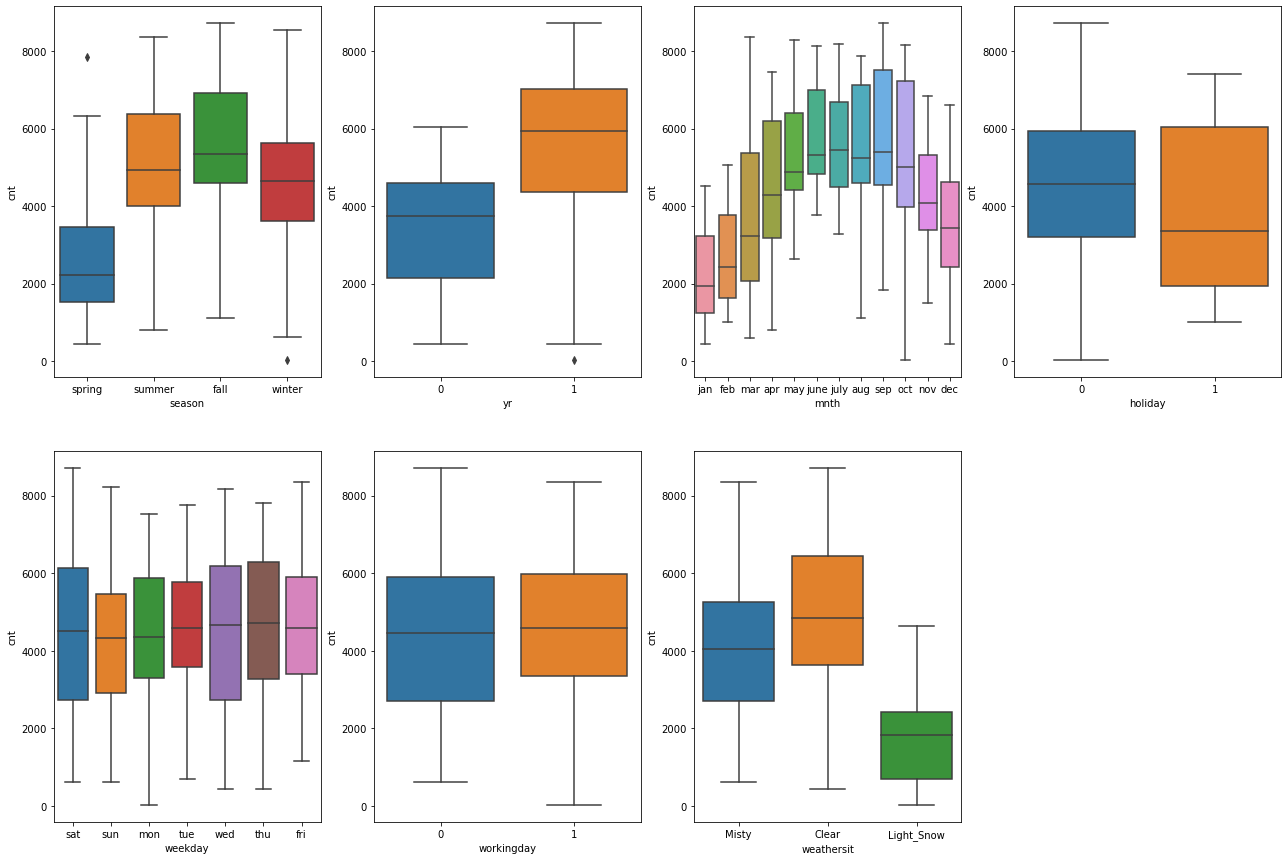

In [13]:
# For categorical variables 
# This will give us qualitative understanding of the data.
# One good way to visualize the categorical variable is boxplot
# For all the catergorical variables we will use subplots
plt.figure(figsize=(22, 15))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=day_df)
plt.subplot(2, 4, 2)
sns.boxplot(x='yr', y='cnt', data=day_df)
plt.subplot(2, 4, 3)
sns.boxplot(x='mnth', y='cnt', data=day_df)
plt.subplot(2, 4, 4)
sns.boxplot(x='holiday', y='cnt', data=day_df)
plt.subplot(2, 4, 5)
sns.boxplot(x='weekday', y='cnt', data=day_df)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=day_df)
plt.subplot(2, 4, 7)
sns.boxplot(x='weathersit', y='cnt', data=day_df)
plt.show()

#### Few Observations
- Fall season has higher count(cnt) followed by summer season.
- There is a significant rise in count(cnt) from 2018 (0) to 1 (2019).
- There is a drastic drop in count(cnt) in the month of Dec and Nov.
- When wheather is clear then count(cnt) is higher and when its Light and snow its drastically low.

## Step 2. Preparing the data for modelling (train-test split, rescaling etc.)

- 2.A Encoding
     - Convert binary categorical variable to 0 and 1
     - Convert other categorical varible to dummy variables
- 2.B Splitting into Train and Test
- 2.C Rescaling of the variables

In [14]:
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### 2.A Encoding
- Convert binary categorical variable to 0 and 1
- Convert other categorical varible to dummy variables

In [15]:
# Here yr, holiday and workingday are already either 0 or 1. So nothing to do for them.
day_df['yr'].value_counts()

0    365
1    365
Name: yr, dtype: int64

In [16]:
day_df['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [17]:
day_df['workingday'].value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [18]:
# For other categorical variables we will need dummy variables - we know this from previous mapping too
seasons_dummy_var = pd.get_dummies(day_df['season'], drop_first=True)
seasons_dummy_var.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [19]:
# Lets do the same for other variables too
months_dummy_var = pd.get_dummies(day_df['mnth'] , drop_first=True)
weekdays_dummy_var = pd.get_dummies(day_df['weekday'], drop_first=True)
weathersit_dummy_var = pd.get_dummies(day_df['weathersit'], drop_first=True)

In [20]:
# Now concat the dummy dataframe with the original one
day_df = pd.concat([day_df, seasons_dummy_var, months_dummy_var, 
                    weekdays_dummy_var, weathersit_dummy_var], axis=1)
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_Snow,Misty
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [21]:
# We should drop not needed columns now - season, mnth, weekday & weathersit
day_df = day_df.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1)
day_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_Snow,Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  aug         730 non-null    uint8  
 12  dec         730 non-null    uint8  
 13  feb         730 non-null    uint8  
 14  jan         730 non-null    uint8  
 15  july        730 non-null    uint8  
 16  june        730 non-null    uint8  
 17  mar         730 non-null    uint8  
 18  may         730 non-null    uint8  
 19  nov         730 non-null    u

In [23]:
day_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_Snow,Misty
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.336986
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 2.B Splitting into Train and Test

In [24]:
# Lets have 70% data for train and 30% for test
df_train, df_test = train_test_split(day_df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


#### 2.C Rescaling of the variables
- I will use Min-Max scaling (Normalization) --> compresses all the data between 0 and 1

In [25]:
# Creating MinMaxScaler object
scaler = MinMaxScaler()
# create a list of numeric variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
# fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()
# So all numberic values are now between 0 and 1

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_Snow,Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [26]:
df_train[num_vars].describe()
# We can see max value is 1 in all cases

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


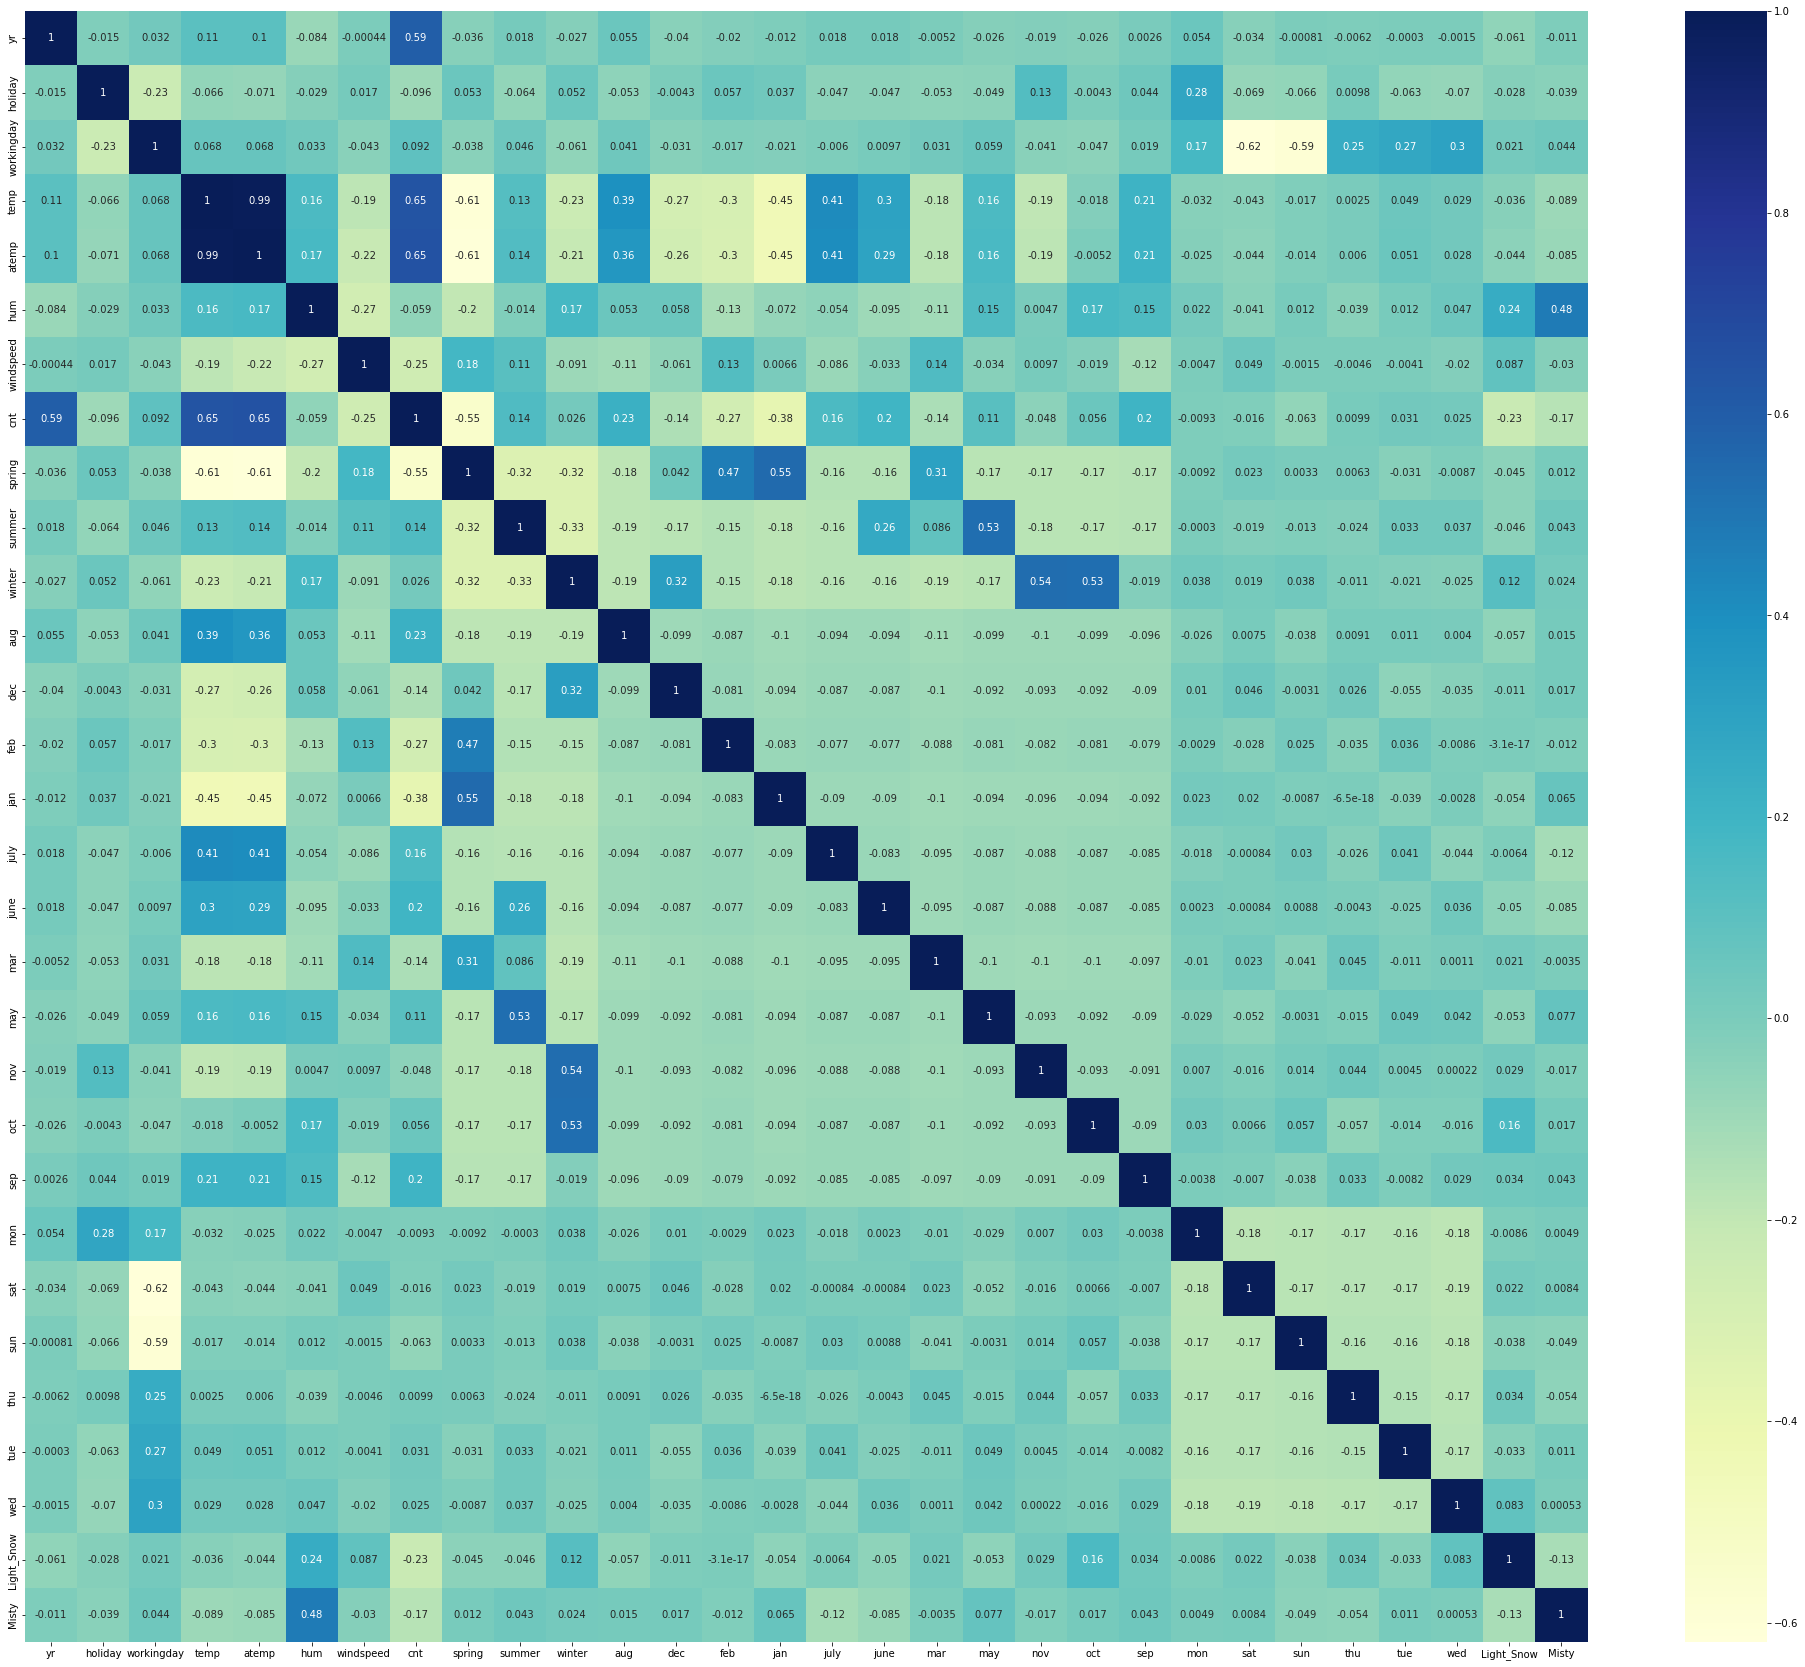

In [27]:
# Lets create a heatmap to see which variables are most co-related with count(cnt)
plt.figure(figsize=(35,30))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()
# We see yr, temp and atemp are higest positively realted with cnt

## Step 3. Training the model
- I use RFE(Recursive Feature Elimination) plus manual approach for this

In [28]:
# Lets have X_train and y_train
y_train = df_train.pop('cnt')
X_train = df_train
print(X_train.head())
print(y_train.head())

     yr  holiday  workingday      temp     atemp       hum  windspeed  spring  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686       0   
426   1        0           0  0.442393  0.438975  0.640189   0.255342       1   
728   1        0           0  0.245101  0.200348  0.498067   0.663106       1   
482   1        0           0  0.395666  0.391735  0.504508   0.188475       0   
111   0        0           1  0.345824  0.318819  0.751824   0.380981       0   

     summer  winter  ...  oct  sep  mon  sat  sun  thu  tue  wed  Light_Snow  \
576       0       0  ...    0    0    0    0    0    0    1    0           0   
426       0       0  ...    0    0    0    1    0    0    0    0           0   
728       0       0  ...    0    0    0    0    1    0    0    0           0   
482       1       0  ...    0    0    0    1    0    0    0    0           0   
111       1       0  ...    0    0    0    0    0    0    0    0           0   

     Misty  
576      0  
426   

In [29]:
# For RFE
lm = LinearRegression()
lm.fit(X_train, y_train)
# Running RFE with the output number of variables = 20
rfe = RFE(lm, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [30]:
# To get ranking of features
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 2),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 9),
 ('mar', False, 10),
 ('may', True, 1),
 ('nov', True, 1),
 ('oct', False, 8),
 ('sep', True, 1),
 ('mon', False, 4),
 ('sat', True, 1),
 ('sun', False, 3),
 ('thu', False, 6),
 ('tue', False, 5),
 ('wed', False, 7),
 ('Light_Snow', True, 1),
 ('Misty', True, 1)]

In [31]:
# taking features for which rfe support is True.
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'dec', 'feb', 'jan', 'july', 'may', 'nov',
       'sep', 'sat', 'Light_Snow', 'Misty'],
      dtype='object')

In [32]:
# features for which rfe support is False.
X_train.columns[~rfe.support_]

Index(['aug', 'june', 'mar', 'oct', 'mon', 'sun', 'thu', 'tue', 'wed'], dtype='object')

### Building model using statsmodel for the detailed statistics

In [33]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,dec,feb,jan,july,may,nov,sep,sat,Light_Snow,Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,1,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.824359,0.679690,0.187140,0,0,0,0,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,1,0,0,0,1,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.223544,0.577930,0.431816,0,0,1,1,0,0,0,0,0,0,1,0,1
79,0,0,1,0.462664,0.434043,0.759870,0.529881,0,1,0,0,0,0,0,0,0,0,0,0,1


In [34]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)
# Running the Linear model
lm = sm.OLS(y_train, X_train_rfe).fit()
# printing the summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.3
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          6.28e-188
Time:                        14:31:43   Log-Likelihood:                 525.41
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     489   BIC:                            -919.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2973      0.039      7.717      0.000       0.222       0.373
yr             0.2318      0.008     29.075      0.000       0.216       0.247
holiday       -0.0490      0.027     -1.816      0.070      -0.102       0.004
workingday     0.0441      0.011      3.849      0.000       0.022       0.067
temp           0.4267      0.134      3.194      0.001       0.164       0.689
atemp          0.0273      0.135      0.202      0.840      -0.238       0.293
hum           -0.1542      0.038     -4.095      0.000      -0.228      -0.080
windspeed     -0.1862      0.026     -7.183      0.000      -0.237      -0.135
spring        -0.0559      0.022     -2.529      0.012      -0.099      -0.012
summer         0.0288      0.017      1.672      0.095      -0.005       0.063
winter         0.0994      0.018      5.477      0.000       0.064       0.135
dec           -0.0488      0.018     -2.692      0.007      -0.084      -0.013
feb           -0.0347      0.021     -1.623      0.105      -0.077       0.007
jan           -0.0649      0.021     -3.058      0.002      -0.107      -0.023
july          -0.0513      0.018     -2.849      0.005      -0.087      -0.016
may            0.0230      0.017      1.330      0.184      -0.011       0.057
nov           -0.0461      0.019     -2.456      0.014      -0.083      -0.009
sep            0.0721      0.017      4.322      0.000       0.039       0.105
sat            0.0545      0.014      3.771      0.000       0.026       0.083
Light_Snow    -0.2545      0.026     -9.724      0.000      -0.306      -0.203
Misty         -0.0583      0.010     -5.643      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       83.276   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.047
Skew:                          -0.790   Prob(JB):                     1.50e-51
Kurtosis:                       5.919   Cond. No.                         86.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Here we see R-squared is 0.852 means 85.2% of the variance in value of cnt is defined by above variables.
- Now lets check for VIF

### To drop features using below method
- Cases are
   - 1. High p-value, high VIF - drop
   - 2. High-low
        - High p, low VIF --> First remove this
        - low p, High VIF --> 2nd after recalculation take the call, remove this after 
   - 3. Both low - keep

So for High-low case we will first remove feature with High p value. Then we recalculate the VIF (this might have changed for other variables)
Again take the call. Remember to remove only one variable at a time.

In [35]:
def print_VIF(X_train_rfe):
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [36]:
# Lets drop const
X_train_rfe = X_train_rfe.drop(['const'], axis=1)
print_VIF(X_train_rfe)

      Features     VIF
3         temp  379.77
4        atemp  368.95
5          hum   31.79
7       spring    5.73
2   workingday    5.40
6    windspeed    5.13
9       winter    4.28
8       summer    3.59
12         jan    2.40
19       Misty    2.33
0           yr    2.11
17         sat    2.01
11         feb    1.92
15         nov    1.88
10         dec    1.70
13        july    1.61
14         may    1.59
16         sep    1.43
18  Light_Snow    1.29
1      holiday    1.21


In [37]:
# We need to drop atemp as it has p-value of 0.840 > 0.05 and VIF = 368.95 > 5.0
X_train_new = X_train_rfe.drop(['atemp'], axis=1)

In [38]:
# Rebuilding the model without atemp
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)
# Running the Linear model
lm = sm.OLS(y_train, X_train_lm).fit()
# printing the summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          5.20e-189
Time:                        14:31:43   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2970      0.038      7.722      0.000       0.221       0.373
yr             0.2318      0.008     29.103      0.000       0.216       0.247
holiday       -0.0492      0.027     -1.827      0.068      -0.102       0.004
workingday     0.0441      0.011      3.852      0.000       0.022       0.067
temp           0.4527      0.038     11.846      0.000       0.378       0.528
hum           -0.1538      0.038     -4.094      0.000      -0.228      -0.080
windspeed     -0.1873      0.025     -7.371      0.000      -0.237      -0.137
spring        -0.0553      0.022     -2.528      0.012      -0.098      -0.012
summer         0.0295      0.017      1.747      0.081      -0.004       0.063
winter         0.1001      0.018      5.618      0.000       0.065       0.135
dec           -0.0488      0.018     -2.692      0.007      -0.084      -0.013
feb           -0.0348      0.021     -1.626      0.105      -0.077       0.007
jan           -0.0650      0.021     -3.067      0.002      -0.107      -0.023
july          -0.0510      0.018     -2.844      0.005      -0.086      -0.016
may            0.0229      0.017      1.325      0.186      -0.011       0.057
nov           -0.0461      0.019     -2.456      0.014      -0.083      -0.009
sep            0.0723      0.017      4.349      0.000       0.040       0.105
sat            0.0544      0.014      3.774      0.000       0.026       0.083
Light_Snow    -0.2549      0.026     -9.773      0.000      -0.306      -0.204
Misty         -0.0583      0.010     -5.655      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       82.971   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.033
Skew:                          -0.787   Prob(JB):                     2.50e-51
Kurtosis:                       5.914   Cond. No.                         24.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Still R-squared is 85.2% and Adjusted R-Squared is 84.6% which is close.

In [40]:
# Lets check VIF
# Lets drop const
X_train_lm = X_train_lm.drop(['const'], axis=1)
print_VIF(X_train_lm)

      Features    VIF
4          hum  31.74
3         temp  19.84
6       spring   5.62
2   workingday   5.40
5    windspeed   4.88
8       winter   4.12
7       summer   3.44
11         jan   2.40
18       Misty   2.33
0           yr   2.11
16         sat   2.01
10         feb   1.92
14         nov   1.88
9          dec   1.70
12        july   1.60
13         may   1.58
15         sep   1.42
17  Light_Snow   1.28
1      holiday   1.21


In [41]:
# Lets remove may as it has R-squared as 0.186 > 0.05
X_train_new = X_train_lm.drop(['may'], axis=1)

In [42]:
# Rebuilding the model without may
# Adding a constant variable
X_train_lm2 = sm.add_constant(X_train_new)
# Running the Linear model
lm = sm.OLS(y_train, X_train_lm2).fit()
# printing the summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          9.80e-190
Time:                        14:31:43   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2868      0.038      7.605      0.000       0.213       0.361
yr             0.2312      0.008     29.052      0.000       0.216       0.247
holiday       -0.0500      0.027     -1.855      0.064      -0.103       0.003
workingday     0.0442      0.011      3.860      0.000       0.022       0.067
temp           0.4616      0.038     12.262      0.000       0.388       0.536
hum           -0.1477      0.037     -3.958      0.000      -0.221      -0.074
windspeed     -0.1889      0.025     -7.441      0.000      -0.239      -0.139
spring        -0.0515      0.022     -2.373      0.018      -0.094      -0.009
summer         0.0393      0.015      2.586      0.010       0.009       0.069
winter         0.1021      0.018      5.752      0.000       0.067       0.137
dec           -0.0474      0.018     -2.619      0.009      -0.083      -0.012
feb           -0.0334      0.021     -1.562      0.119      -0.075       0.009
jan           -0.0634      0.021     -2.991      0.003      -0.105      -0.022
july          -0.0515      0.018     -2.868      0.004      -0.087      -0.016
nov           -0.0444      0.019     -2.371      0.018      -0.081      -0.008
sep            0.0723      0.017      4.346      0.000       0.040       0.105
sat            0.0540      0.014      3.743      0.000       0.026       0.082
Light_Snow    -0.2567      0.026     -9.849      0.000      -0.308      -0.206
Misty         -0.0585      0.010     -5.668      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       80.597   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.714
Skew:                          -0.784   Prob(JB):                     3.91e-47
Kurtosis:                       5.757   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# R-squared is 85.1% but Adj. R-squared is still 84.6%

In [44]:
# Lets check VIF
# Lets drop const
X_train_lm2 = X_train_lm2.drop(['const'], axis=1)
print_VIF(X_train_lm2)

      Features    VIF
4          hum  31.71
3         temp  19.75
6       spring   5.61
2   workingday   5.38
5    windspeed   4.79
8       winter   4.12
7       summer   2.89
11         jan   2.40
17       Misty   2.33
0           yr   2.10
15         sat   2.00
10         feb   1.92
13         nov   1.88
9          dec   1.70
12        july   1.60
14         sep   1.42
16  Light_Snow   1.28
1      holiday   1.21


In [45]:
# Lets remove feb as it has R-squared as 0.119 > 0.05
X_train_new = X_train_lm2.drop(['feb'], axis=1)

# Rebuilding the model without feb
# Adding a constant variable
X_train_lm3 = sm.add_constant(X_train_new)
# Running the Linear model
lm = sm.OLS(y_train, X_train_lm3).fit()
# printing the summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          2.52e-190
Time:                        14:31:44   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2756      0.037      7.433      0.000       0.203       0.348
yr             0.2309      0.008     28.978      0.000       0.215       0.247
holiday       -0.0520      0.027     -1.931      0.054      -0.105       0.001
workingday     0.0444      0.011      3.870      0.000       0.022       0.067
temp           0.4764      0.036     13.064      0.000       0.405       0.548
hum           -0.1494      0.037     -4.001      0.000      -0.223      -0.076
windspeed     -0.1879      0.025     -7.390      0.000      -0.238      -0.138
spring        -0.0607      0.021     -2.899      0.004      -0.102      -0.020
summer         0.0424      0.015      2.809      0.005       0.013       0.072
winter         0.1038      0.018      5.845      0.000       0.069       0.139
dec           -0.0388      0.017     -2.248      0.025      -0.073      -0.005
jan           -0.0455      0.018     -2.548      0.011      -0.081      -0.010
july          -0.0524      0.018     -2.916      0.004      -0.088      -0.017
nov           -0.0399      0.019     -2.152      0.032      -0.076      -0.003
sep            0.0737      0.017      4.430      0.000       0.041       0.106
sat            0.0548      0.014      3.794      0.000       0.026       0.083
Light_Snow    -0.2555      0.026     -9.791      0.000      -0.307      -0.204
Misty         -0.0583      0.010     -5.637      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       76.194   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.529
Skew:                          -0.745   Prob(JB):                     2.85e-44
Kurtosis:                       5.687   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# R-squared is 85% and Adj. R-squared is still 84.5%

In [47]:
# Lets check VIF
# Lets drop const
X_train_lm3 = X_train_lm3.drop(['const'], axis=1)
print_VIF(X_train_lm3)

      Features    VIF
4          hum  31.11
3         temp  19.14
2   workingday   5.37
5    windspeed   4.78
6       spring   4.57
8       winter   4.12
7       summer   2.89
16       Misty   2.32
0           yr   2.09
14         sat   2.00
12         nov   1.86
10         jan   1.76
11        july   1.60
9          dec   1.58
13         sep   1.42
15  Light_Snow   1.28
1      holiday   1.20


In [48]:
# Lets remove holiday as it has R-squared as 0.054 > 0.05
X_train_new = X_train_lm3.drop(['holiday'], axis=1)

# Rebuilding the model without feb
# Adding a constant variable
X_train_lm4 = sm.add_constant(X_train_new)
# Running the Linear model
lm = sm.OLS(y_train, X_train_lm4).fit()
# printing the summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.20e-190
Time:                        14:31:44   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -936.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2690      0.037      7.267      0.000       0.196       0.342
yr             0.2311      0.008     28.929      0.000       0.215       0.247
workingday     0.0521      0.011      4.826      0.000       0.031       0.073
temp           0.4744      0.037     12.978      0.000       0.403       0.546
hum           -0.1480      0.037     -3.952      0.000      -0.222      -0.074
windspeed     -0.1883      0.025     -7.386      0.000      -0.238      -0.138
spring        -0.0624      0.021     -2.974      0.003      -0.104      -0.021
summer         0.0421      0.015      2.783      0.006       0.012       0.072
winter         0.1038      0.018      5.832      0.000       0.069       0.139
dec           -0.0398      0.017     -2.302      0.022      -0.074      -0.006
jan           -0.0465      0.018     -2.596      0.010      -0.082      -0.011
july          -0.0514      0.018     -2.854      0.004      -0.087      -0.016
nov           -0.0441      0.018     -2.390      0.017      -0.080      -0.008
sep            0.0714      0.017      4.289      0.000       0.039       0.104
sat            0.0625      0.014      4.493      0.000       0.035       0.090
Light_Snow    -0.2552      0.026     -9.754      0.000      -0.307      -0.204
Misty         -0.0581      0.010     -5.607      0.000      -0.078      -0.038
==============================================================================
Omnibus:                       82.403   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.435
Skew:                          -0.787   Prob(JB):                     4.10e-50
Kurtosis:                       5.867   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# R-squared is 84.9 and Adj. R-squared is still 84.4%

In [50]:
# Lets check VIF
# Lets drop const
X_train_lm4 = X_train_lm4.drop(['const'], axis=1)
print_VIF(X_train_lm4)

      Features    VIF
3          hum  31.08
2         temp  18.94
1   workingday   4.77
4    windspeed   4.77
5       spring   4.50
7       winter   4.11
6       summer   2.88
15       Misty   2.32
0           yr   2.09
13         sat   1.86
11         nov   1.82
9          jan   1.76
10        july   1.59
8          dec   1.57
12         sep   1.41
14  Light_Snow   1.28


In [51]:
# Lets remove hum as it has VIF as 31.08 > 5.0
X_train_new = X_train_lm4.drop(['hum'], axis=1)

# Rebuilding the model without feb
# Adding a constant variable
X_train_lm5 = sm.add_constant(X_train_new)
# Running the Linear model
lm = sm.OLS(y_train, X_train_lm5).fit()
# printing the summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.7
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.84e-188
Time:                        14:31:44   Log-Likelihood:                 513.34
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1985      0.033      6.031      0.000       0.134       0.263
yr             0.2348      0.008     29.173      0.000       0.219       0.251
workingday     0.0547      0.011      5.009      0.000       0.033       0.076
temp           0.4354      0.036     12.191      0.000       0.365       0.506
windspeed     -0.1609      0.025     -6.464      0.000      -0.210      -0.112
spring        -0.0713      0.021     -3.371      0.001      -0.113      -0.030
summer         0.0354      0.015      2.320      0.021       0.005       0.065
winter         0.0903      0.018      5.093      0.000       0.055       0.125
dec           -0.0467      0.017     -2.675      0.008      -0.081      -0.012
jan           -0.0526      0.018     -2.905      0.004      -0.088      -0.017
july          -0.0466      0.018     -2.554      0.011      -0.082      -0.011
nov           -0.0447      0.019     -2.389      0.017      -0.081      -0.008
sep            0.0652      0.017      3.880      0.000       0.032       0.098
sat            0.0670      0.014      4.758      0.000       0.039       0.095
Light_Snow    -0.2969      0.024    -12.222      0.000      -0.345      -0.249
Misty         -0.0818      0.009     -9.526      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       85.035   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.570
Skew:                          -0.805   Prob(JB):                     9.50e-53
Kurtosis:                       5.946   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# R-squared is 84.4 and Adj. R-squared is 84%

In [53]:
# Lets check VIF
# Lets drop const
# X_train_lm5 = X_train_lm5.drop(['const'], axis=1)
print_VIF(X_train_lm5)

      Features    VIF
0        const  68.39
5       spring   5.20
3         temp   4.10
7       winter   3.69
6       summer   2.74
11         nov   1.75
9          jan   1.67
2   workingday   1.65
13         sat   1.64
8          dec   1.49
10        july   1.48
12         sep   1.32
4    windspeed   1.13
14  Light_Snow   1.06
15       Misty   1.05
1           yr   1.02


### At this point all variables have p-value and VIF (except temp) less than 0.05 and 5.0 respectively. So we stop here.
 - When I removed temp then Adj. R sqaured dropped to 0.792 i.e. 79.2%. Hence keeping it.

## Step 4. Residual Analysis of the train data

In [54]:
# Training dataset of the model
X_train_lm5.head()

,const,yr,workingday,temp,windspeed,spring,summer,winter,dec,jan,july,nov,sep,sat,Light_Snow,Misty
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,1,0,1
728,1.0,1,0,0.245101,0.663106,1,0,0,1,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0,1,0,1
111,1.0,0,1,0.345824,0.380981,0,1,0,0,0,0,0,0,0,0,1


In [55]:
X_train_lm5.shape

(510, 16)

In [56]:
X_train_lm5.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'july', 'nov', 'sep', 'sat', 'Light_Snow',
       'Misty'],
      dtype='object')

In [57]:
y_train_pred = lm.predict(X_train_lm5)
y_train_pred

576    0.753784
426    0.498740
728    0.315280
482    0.595855
111    0.296112
         ...   
578    0.834078
53     0.252189
350    0.265838
79     0.323028
520    0.645137
Length: 510, dtype: float64

### Plotting the histogram of the error terms

Text(0.5, 0, 'Errors')

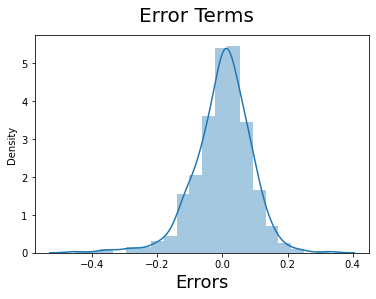

In [58]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins=20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)    

### Error terms is a normal distribution

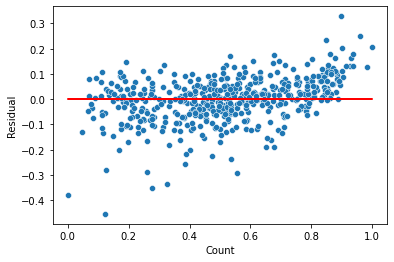

In [59]:
# Check for Homoscedasticity

residual = y_train - y_train_pred
sns.scatterplot(y_train, residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

### We see that variance for the Residual error is constant

## Step 5. Making Predictions

#### Applying the scaling on the test sets

In [60]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [61]:
y_test = df_test.pop('cnt')
X_test = df_test

In [62]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [63]:
X_train_new

,yr,workingday,temp,windspeed,spring,summer,winter,dec,jan,july,nov,sep,sat,Light_Snow,Misty
576,1,1,0.815169,0.264686,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,1,0,1
728,1,0,0.245101,0.663106,1,0,0,1,0,0,0,0,0,0,0
482,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0,1,0,1
111,0,1,0.345824,0.380981,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,1,0.863973,0.187140,0,0,0,0,0,0,0,0,0,0,0
53,0,1,0.202618,0.111379,1,0,0,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.431816,0,0,1,1,0,0,0,0,1,0,1
79,0,1,0.462664,0.529881,0,1,0,0,0,0,0,0,0,0,1


In [64]:
# Prdicting using the last model
y_test_pred = lm.predict(X_test_new)
y_test_pred

184    0.418754
535    0.891123
299    0.430858
221    0.582422
152    0.557954
         ...   
702    0.712038
127    0.477235
640    0.812785
72     0.293521
653    0.751901
Length: 220, dtype: float64

## Step 6. Model Evaluation

In [65]:
# R-squared score on the train dataset 
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.8444123751564842

In [66]:
# R-squared score on the test dataset
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8168681962672555

## So we see R-Squared for training dataset is 0.8444123751564842 and for test dataset is 0.8168681962672555, which are close.

Text(0, 0.5, 'y_test_pred')

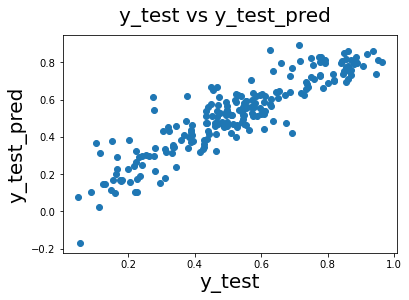

In [67]:
# Plotting y_test and y_pred for spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 20)
plt.ylabel('y_test_pred', fontsize = 20) 

In [68]:
# Coefficients of the model
round(lm.params, 4)

const         0.1985
yr            0.2348
workingday    0.0547
temp          0.4354
windspeed    -0.1609
spring       -0.0713
summer        0.0354
winter        0.0903
dec          -0.0467
jan          -0.0526
july         -0.0466
nov          -0.0447
sep           0.0652
sat           0.0670
Light_Snow   -0.2969
Misty        -0.0818
dtype: float64

## So Final model is 
- Equation of the model:
     
     cnt = 0.2348*yr + 0.0547*workingday + 0.4354*temp - 0.1609*windspeed - 0.0713*spring + 0.0354*summer + 0.0903*winter - 0.0467*dec - 0.0526*jan - 0.0466*july - 0.0447*nov + 0.0652*sep + 0.0670*sat - 0.2969*Light_Snow - 0.0818*Misty + 0.1985
            